# Claim Exploratory Analysis

## 1) Bringing the data

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cf1d23c0ed6b4f75a8211ba548512868 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='******** ADD CLOUD OBJECT STORAGE API KEY HERE ************',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='******** ADD CLOUD OBJECT STORAGE ENDPOINT URL HERE ************')

# Key might need to be changed, depending on what you named the insurnace file
body = client_cf1d23c0ed6b4f75a8211ba548512868.get_object(Bucket='******** Cloud Object Store Bucket Name Here ************',Key='insurance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_claim = pd.read_csv(body)
df_claim.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2) importing visualization libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches


## 3) exploring data

### statistical description:

In [21]:
df_claim.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### A) Q: Is there relationship between BMI and claim amount?

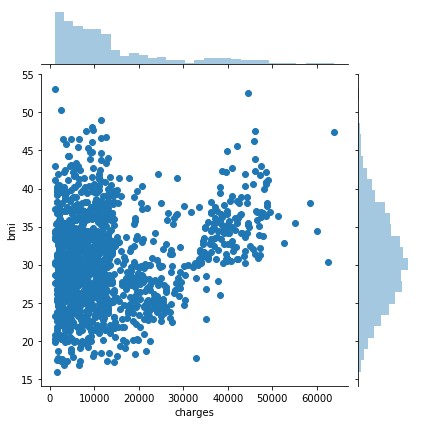

In [3]:
sns.jointplot(x=df_claim["charges"], y=df_claim["bmi"], kind='scatter')

plt.show()

#### A) A: There are NO replationships between BMI and  claim amount

#### B) Q: Is there relationship between gender and claim amount?

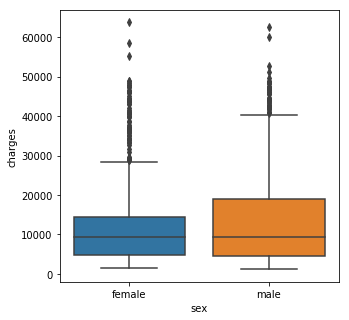

In [4]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'sex', y = 'charges',  data = df_claim)

#### B) A: On average claims from male and female are the same with slightly bigger proportion of higher amounts for male

#### C) Q: Is there relationship between region and claim amount?

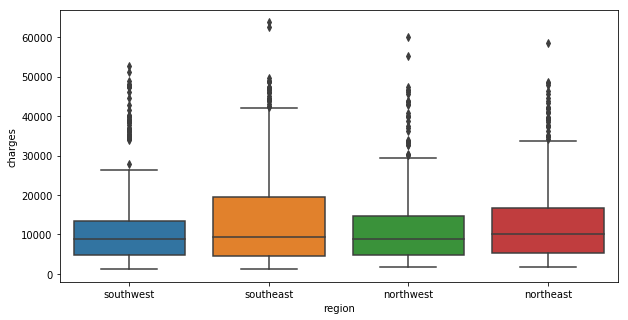

In [5]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'region', y = 'charges',  data = df_claim)

#### C) A: On average claims from regions are the same with slightly bigger proportion of higher amounts from Southeast

#### D) Q: Is there relationships between claim amount between smokers and non-smokers?

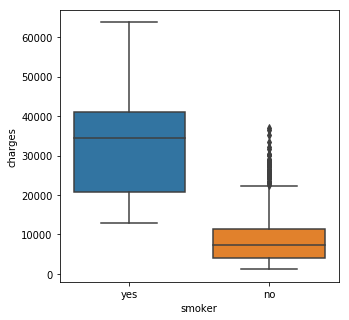

In [6]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'smoker', y = 'charges',  data = df_claim)

#### D) A: There is a strong replationship between smokers and  non-smokers with claims from smokers being much higher

##### D.i Q: is the smoker group well represented?

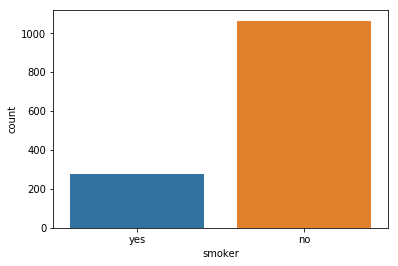

In [22]:
sns.countplot(x='smoker', data=df_claim)

### E) Q: Is there relationship between claim amount and age?

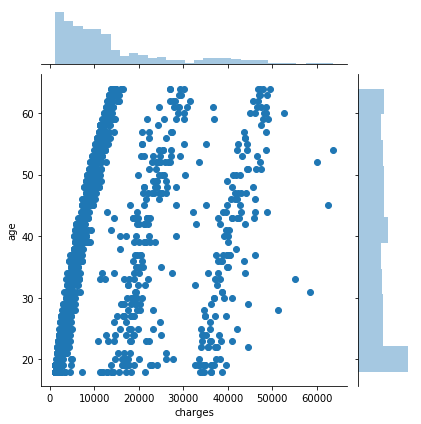

In [7]:
sns.jointplot(x=df_claim["charges"], y=df_claim["age"], kind='scatter')

plt.show()

### E) A: Claim amounts increase with age and tend to form groups around 1.2K, up to 3K, and more than 3K

## 4) understanding data

###### based on observations above let's bring several variables together to observe the difference
##### IMPACT OF SMOKING

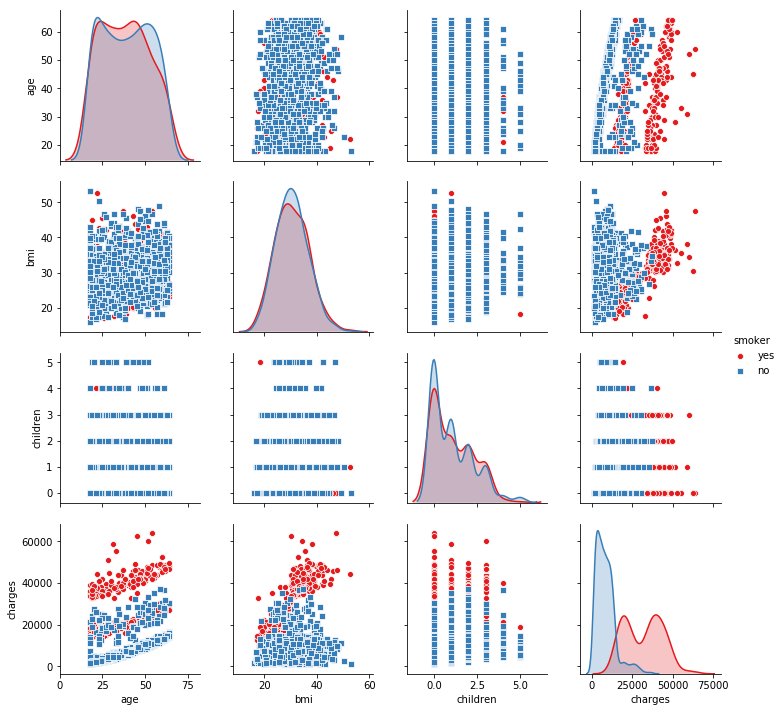

In [22]:
claim_pplot=df_claim[['age', 'bmi', 'children', 'smoker', 'charges']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "smoker" , markers=["o", "s"], palette="Set1")
plt.show()

#### GENDER IMPACT

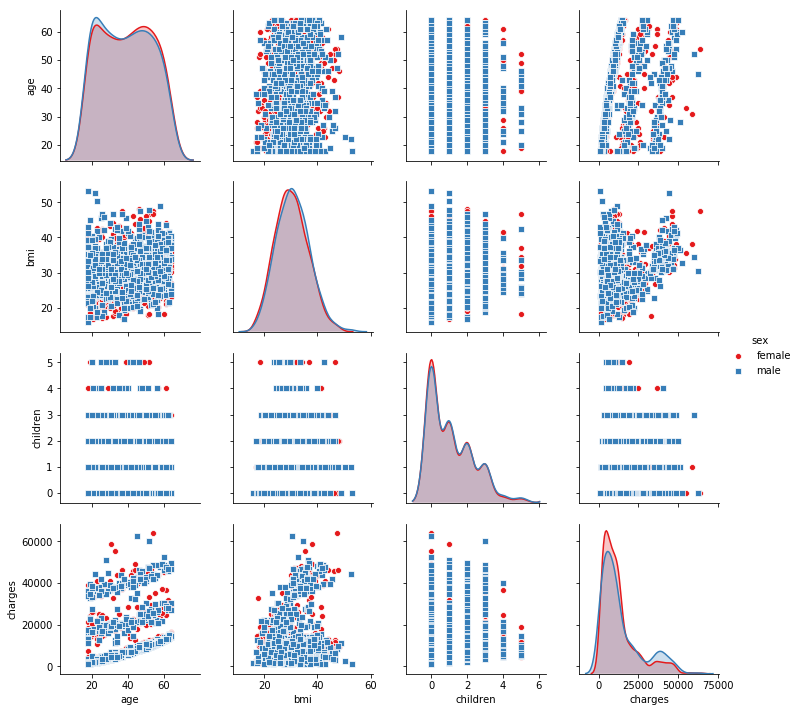

In [25]:
claim_pplot=df_claim[['age', 'bmi', 'children', 'sex', 'charges']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "sex" , markers=["o", "s"], palette="Set1")
plt.show()

#### Summary: Gender has very little impact of the charges, other than being slightly lower.

#### REGION IMPACT

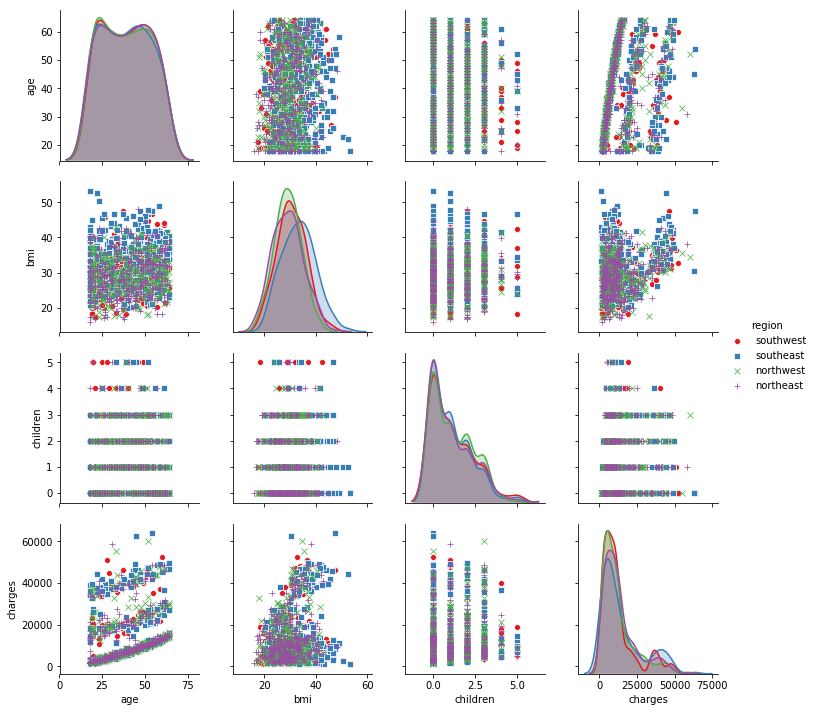

In [30]:
claim_pplot=df_claim[['age', 'bmi', 'children', 'region', 'charges']]
claim_pplot.head()
sns.pairplot(claim_pplot, kind="scatter", hue = "region" , markers=["o", "s","x","+"], palette="Set1")
plt.show()

#### Summary: Region does have some imact on the charges; however we can see some trends as it relates to BMI

In [23]:
#[['age', 'sex','bmi', 'children', 'smoker', 'region', 'charges']]
claim_corr = df_claim[['age', 'sex','bmi', 'children', 'smoker', 'region', 'charges']].corr()

### Summary: The charges are highly affected by claimant being smocker on non-smocker. These smokers tend to have BMIs above average, 30. Region and gender might play some role in determening amount chared